In [19]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Define the folder containing the CSV files
folder_path = 'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData'

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Extract drug and dosage from the filename
        parts = filename.split('_')
        if parts[0] == 'NoDrug':
            drug = 'NoDrug'
            dosage = '0'
        else:
            drug = parts[0]
            dosage = parts[1]
        
        # Load the CSV file into a dataframe
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Add the drug and dosage columns
        df['Drug'] = drug
        df['Dosage'] = dosage
        
        # Append the dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged dataframe to a new CSV file
#merged_df.to_csv('C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/merged_dataset.csv', index=False)

print("Merging complete. The merged dataset has been saved as 'merged_dataset.csv'.")

In [ ]:
# Remove 'nM' from the Dosage column
merged_df['Dosage'] = merged_df['Dosage'].str.replace('nM', '')

# Save the cleaned dataset to a new CSV file
merged_df.to_csv('C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/cleaned_merged_dataset.csv', index=False)

print("Dosage column cleaned and the dataset has been saved as 'cleaned_merged_dataset.csv'.")

In [2]:
## Read in file
merged_df = pd.read_csv('C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/cleaned_merged_dataset.csv')

Statistical Analysis and Visualization

Comparison of Cell Vitality across time between dosages for each drug

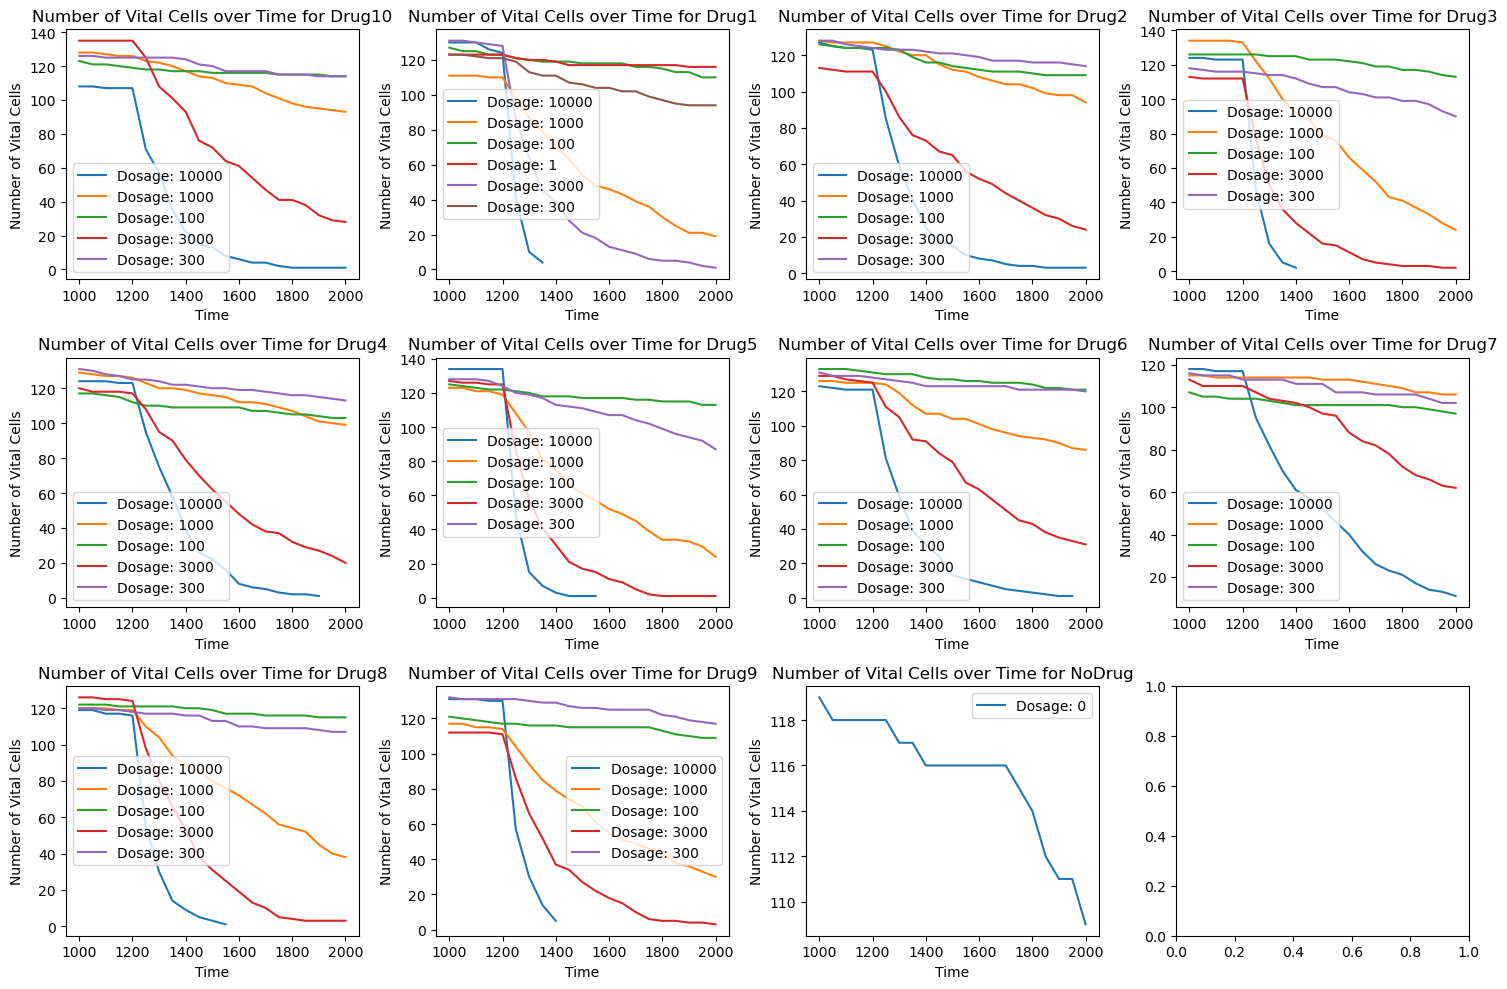

In [7]:
# Filter out rows where is_cell_vital is True
vital_cells_df = merged_df[merged_df['is_cell_vital'] == 1]

# Get unique drugs
unique_drugs = vital_cells_df['Drug'].unique()
# Calculate number of rows and columns for subplots
num_rows = 3
num_cols = 4

# Calculate total number of subplots
num_plots = len(unique_drugs)

# Calculate figure size
fig_width = 15
fig_height = 10

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Loop through each unique drug
for i, drug in enumerate(unique_drugs):
    # Filter data for the current drug
    drug_df = vital_cells_df[vital_cells_df['Drug'] == drug]
    
    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols
    
    # Set current axis
    ax = axes[row, col]
    
    # Loop through each unique dosage for the current drug
    for dosage in drug_df['Dosage'].unique():
        # Filter data for the current dosage
        dosage_df = drug_df[drug_df['Dosage'] == dosage]
        
        # Group by time and sum the number of vital cells
        grouped = dosage_df.groupby('Time')['is_cell_vital'].sum()
        
        # Plot the line
        ax.plot(grouped.index, grouped.values, label=f'Dosage: {dosage}')
    
    # Add labels and legend for each plot
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Vital Cells')
    ax.set_title(f'Number of Vital Cells over Time for {drug}')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Comparison of Cell Vitality across time between drugs for each dosage

In [12]:
# Convert 'Dosage' column to categorical dtype
merged_df['Dosage'] = merged_df['Dosage'].astype('category')
# Filter out rows where is_cell_vital is True
vital_cells_df = merged_df[merged_df['is_cell_vital'] == 1]
# Get unique dosages
unique_dosage = vital_cells_df['Dosage'].unique()
print(unique_dosage)


[10000, 1000, 100, 3000, 300, 1, 0]
Categories (7, int64): [0, 1, 100, 300, 1000, 3000, 10000]


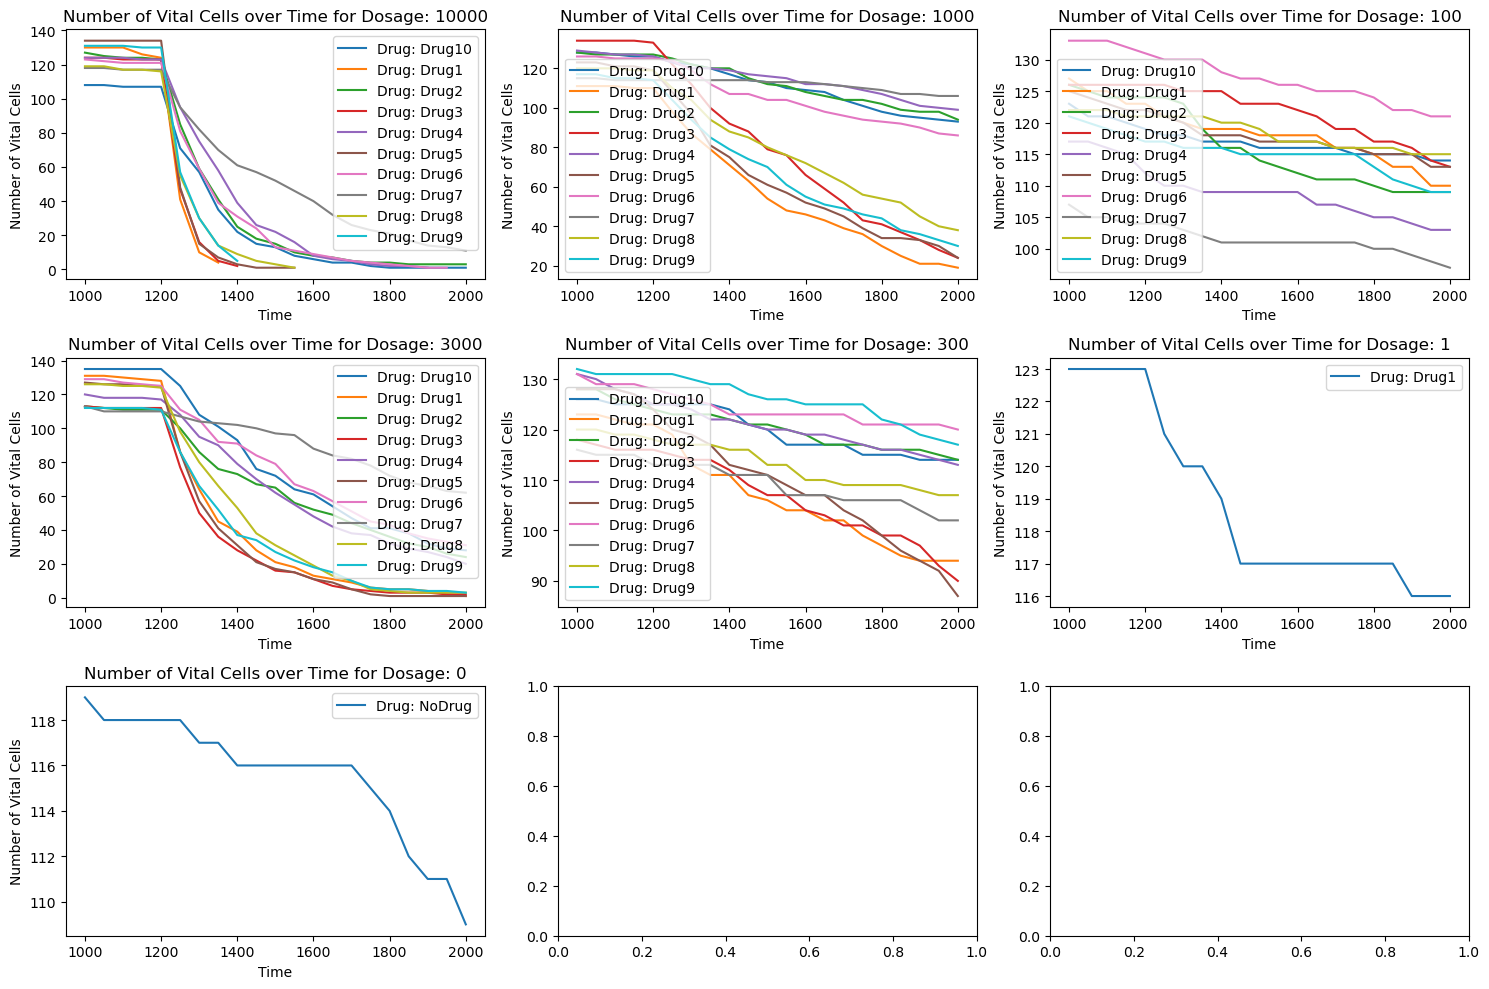

In [16]:
# Calculate number of rows and columns for subplots
num_rows = 3
num_cols = 3

# Calculate total number of subplots
num_plots = len(unique_dosage)

# Calculate figure size
fig_width = 15
fig_height = 10

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Loop through each unique dosage
for i, dosage in enumerate(unique_dosage):
    # Filter data for the current dosage
    dosage_df = vital_cells_df[vital_cells_df['Dosage'] == dosage]
    
    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols
    
    # Set current axis
    ax = axes[row, col]
    
    # Loop through each unique drug for the current dosage
    for drug in dosage_df['Drug'].unique():
        # Filter data for the current drug
        drug_df = dosage_df[dosage_df['Drug'] == drug]
        
        # Group by time and sum the number of vital cells
        grouped = drug_df.groupby('Time')['is_cell_vital'].sum()
        
        # Plot the line
        ax.plot(grouped.index, grouped.values, label=f'Drug: {drug}')
    
    # Add labels and legend for each plot
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Vital Cells')
    ax.set_title(f'Number of Vital Cells over Time for Dosage: {dosage}')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


mRNA nucleus

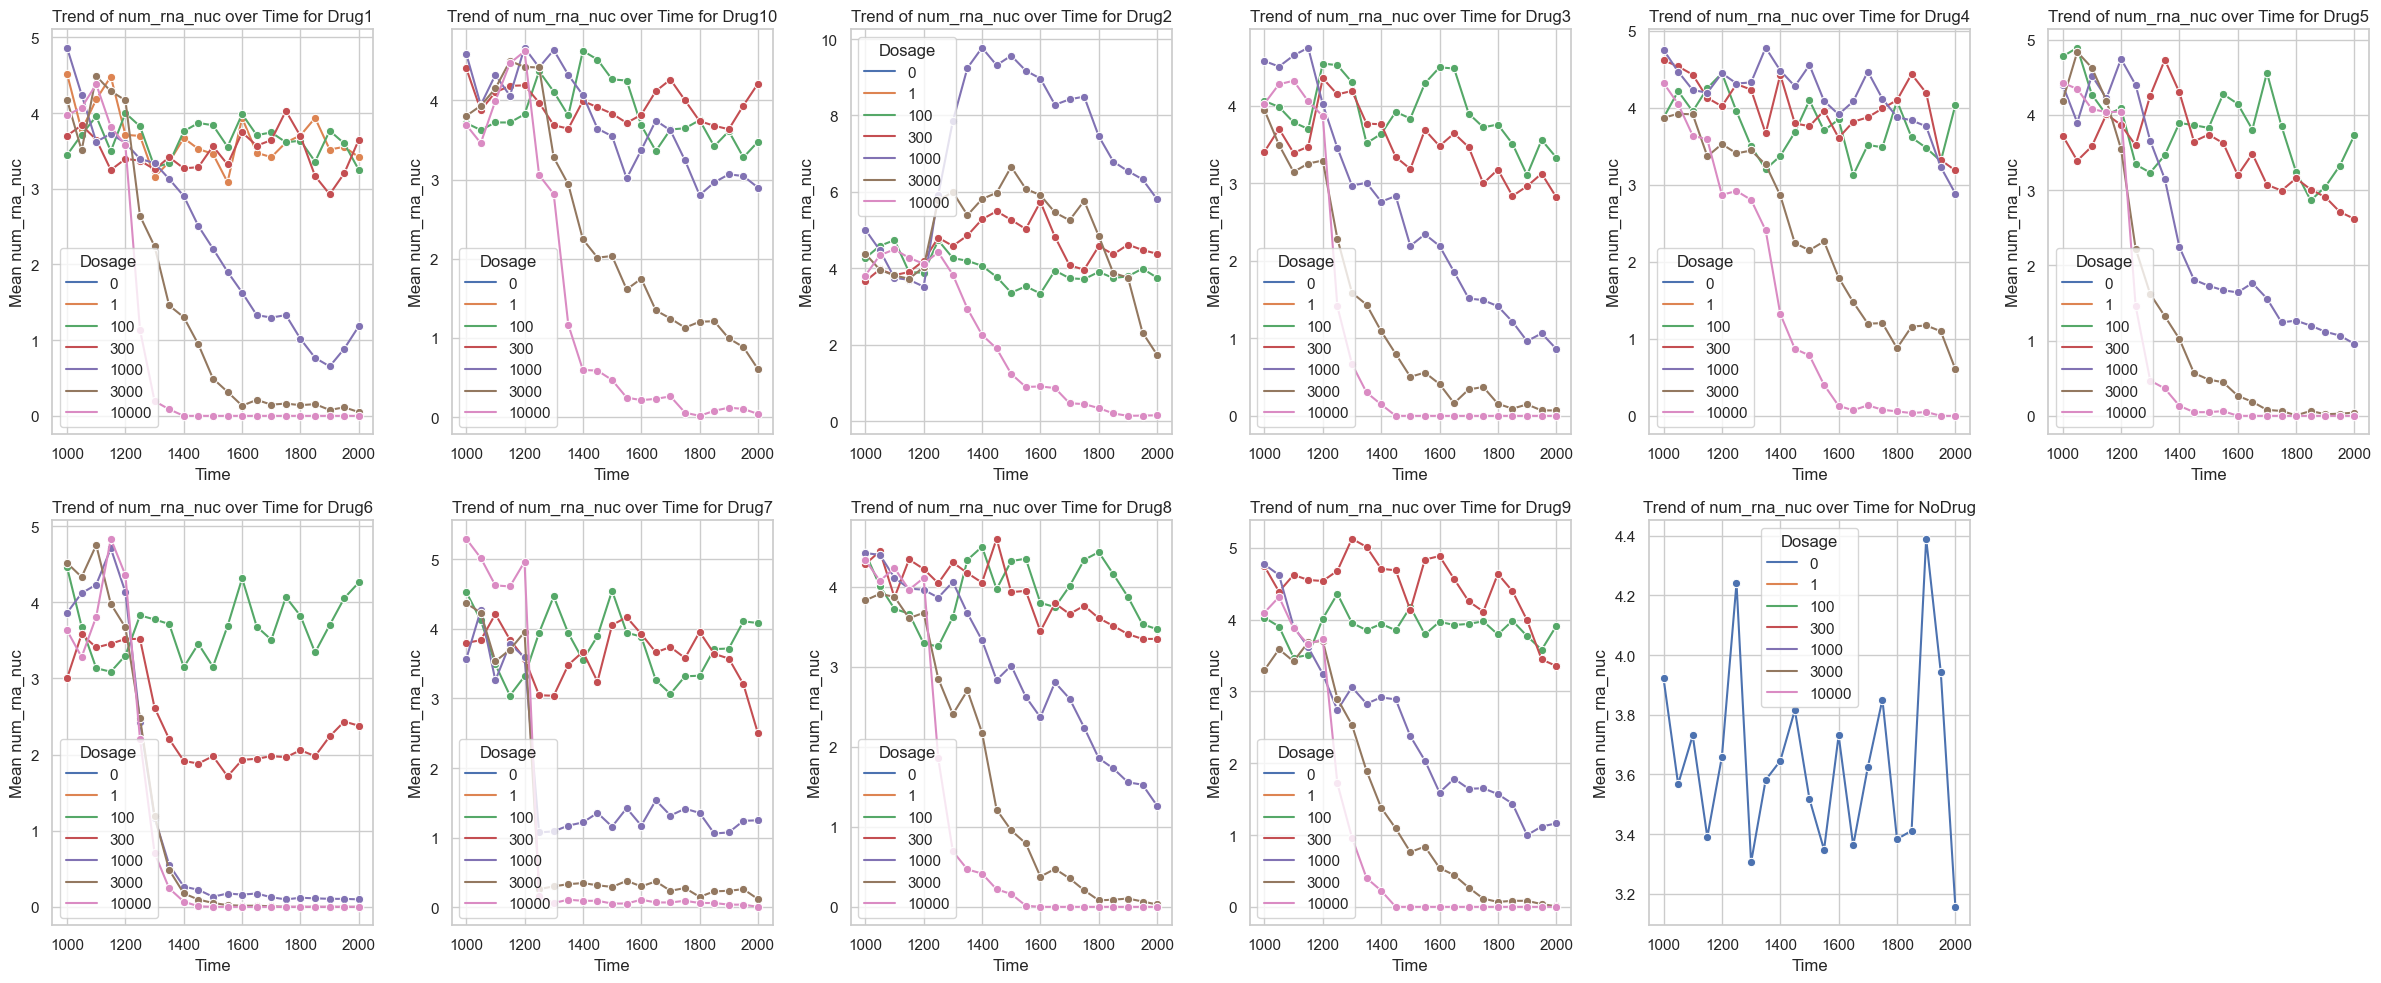

In [29]:
# Group by 'Drug', 'Dosage', and 'Time' to calculate mean num_rna_nuc
grouped_df = merged_df.groupby(['Drug', 'Dosage', 'Time']).mean(numeric_only=True).reset_index()

# Get unique drugs and set up the subplot grid
drugs = grouped_df['Drug'].unique()
num_drugs = len(drugs)
fig, axes = plt.subplots(2, 6, figsize=(24, 10))  # Adjust the grid size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create plots
for i, drug in enumerate(drugs):
    ax = axes[i]
    drug_df = grouped_df[grouped_df['Drug'] == drug]
    sns.lineplot(data=drug_df, x='Time', y='num_rna_nuc', hue='Dosage', marker='o', ax=ax)
    ax.set_title(f'Trend of num_rna_nuc over Time for {drug}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean num_rna_nuc')
    ax.legend(title='Dosage')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

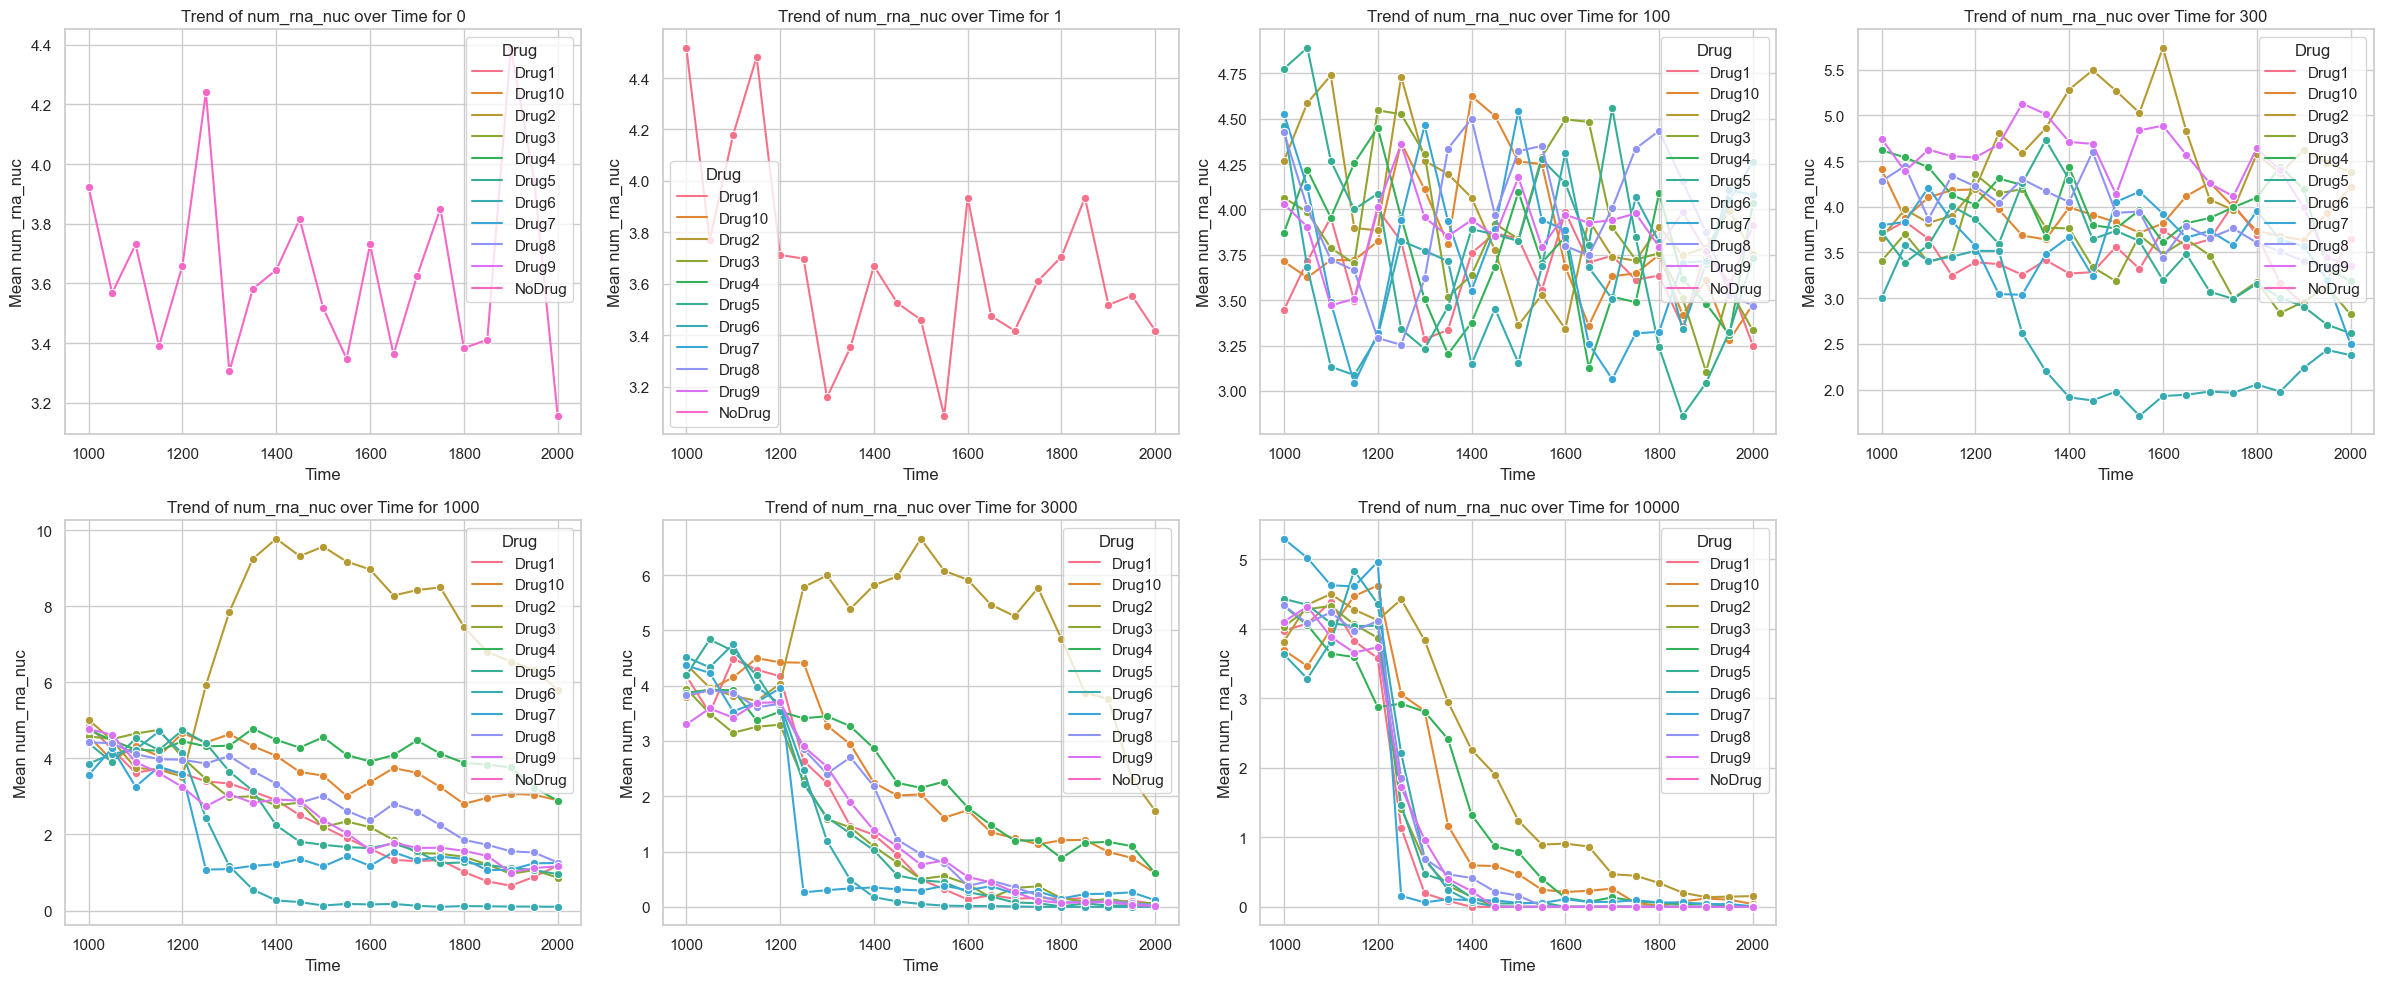

In [30]:
#Get unique drugs and set up the subplot grid
dosage = grouped_df['Dosage'].unique()
num_dosage = len(dosage)
fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # Adjust the grid size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create plots
for i, dosage in enumerate(dosage):
    ax = axes[i]
    dosage_df = grouped_df[grouped_df['Dosage'] == dosage]
    sns.lineplot(data=dosage_df, x='Time', y='num_rna_nuc', hue='Drug', marker='o', ax=ax)
    ax.set_title(f'Trend of num_rna_nuc over Time for {dosage}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean num_rna_nuc')
    ax.legend(title='Drug')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

mRNA cytoplasm

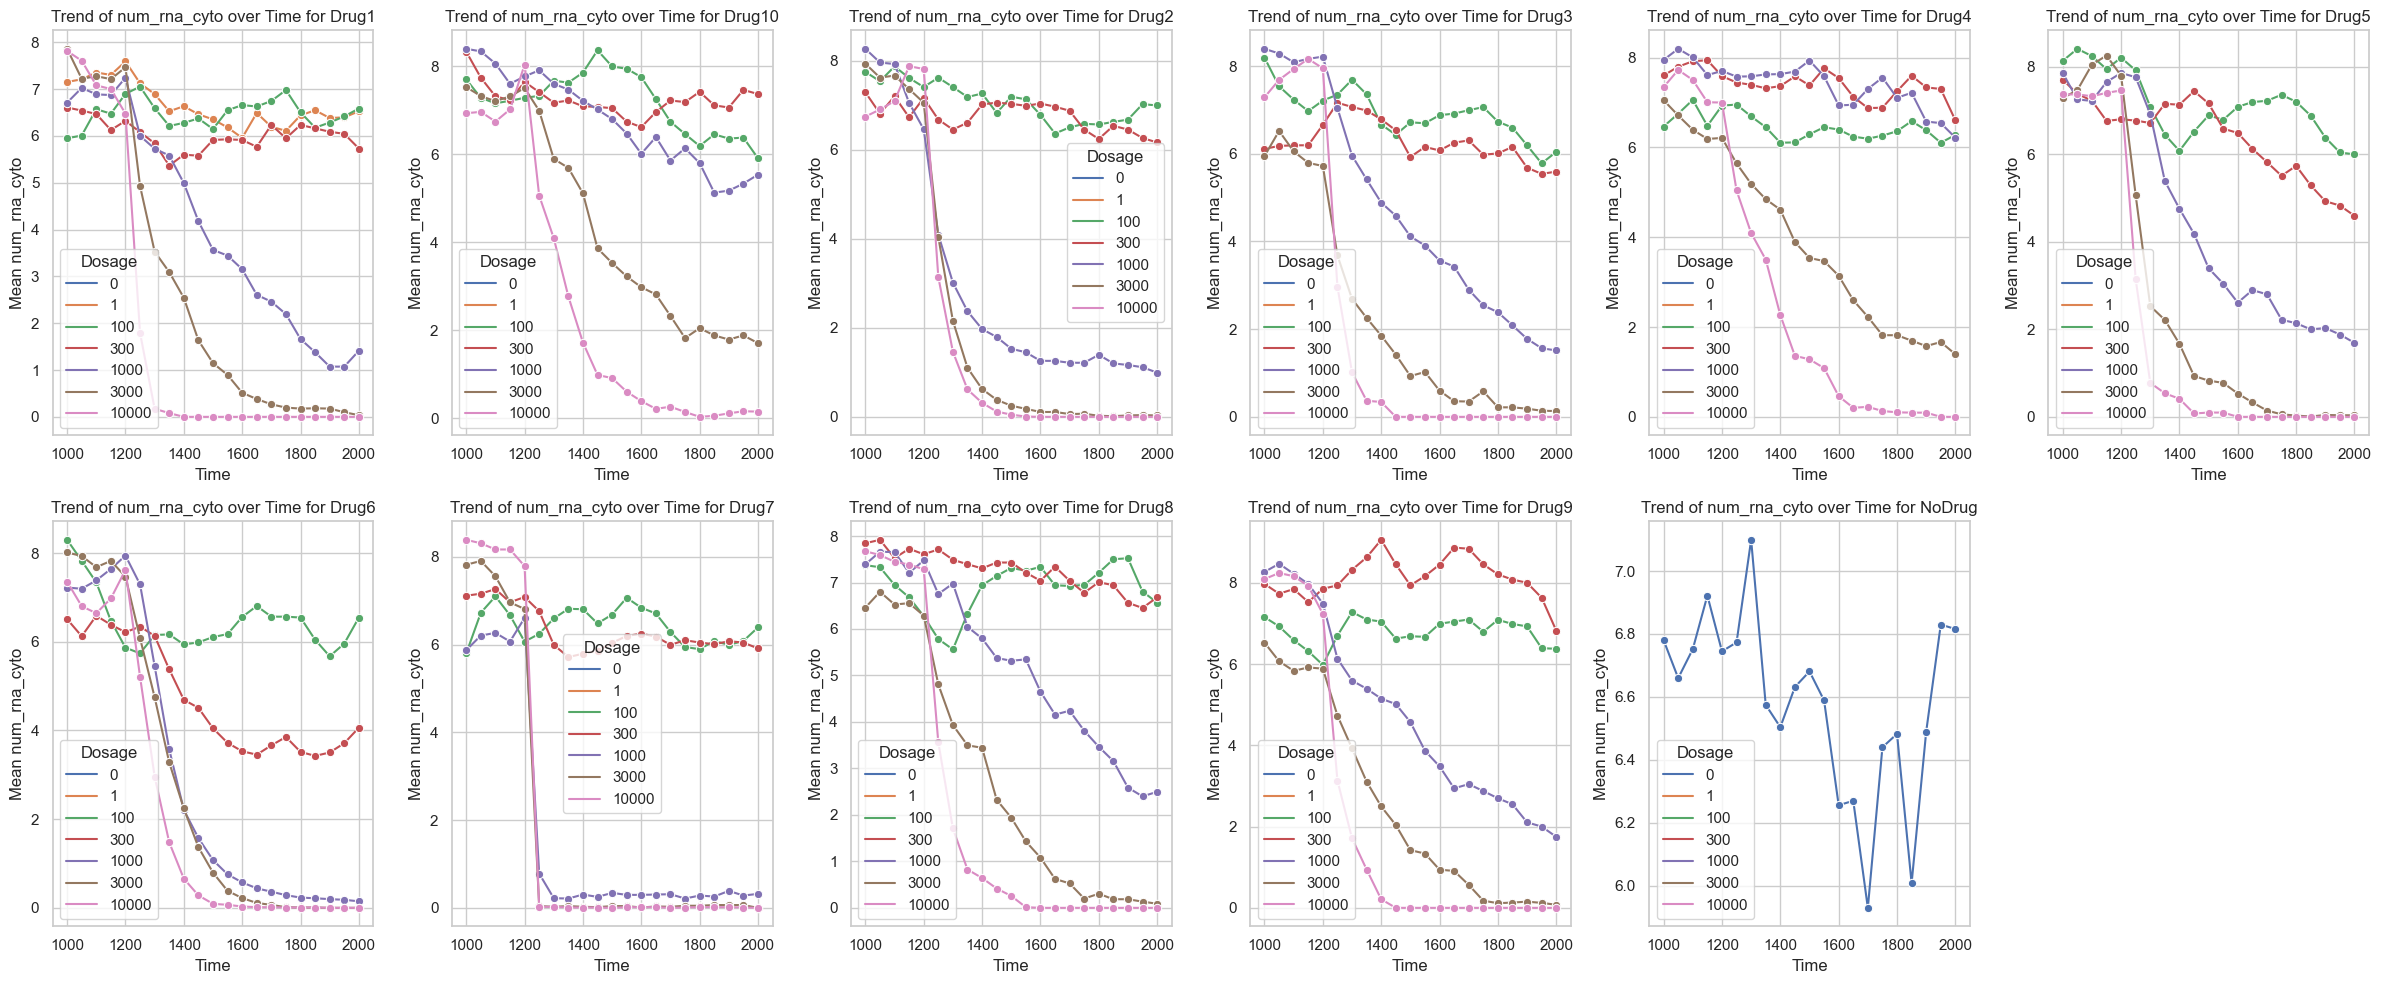

In [31]:
fig, axes = plt.subplots(2, 6, figsize=(24, 10))  # Adjust the grid size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create plots
for i, drug in enumerate(drugs):
    ax = axes[i]
    drug_df = grouped_df[grouped_df['Drug'] == drug]
    sns.lineplot(data=drug_df, x='Time', y='num_rna_cyto', hue='Dosage', marker='o', ax=ax)
    ax.set_title(f'Trend of num_rna_cyto over Time for {drug}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean num_rna_cyto')
    ax.legend(title='Dosage')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

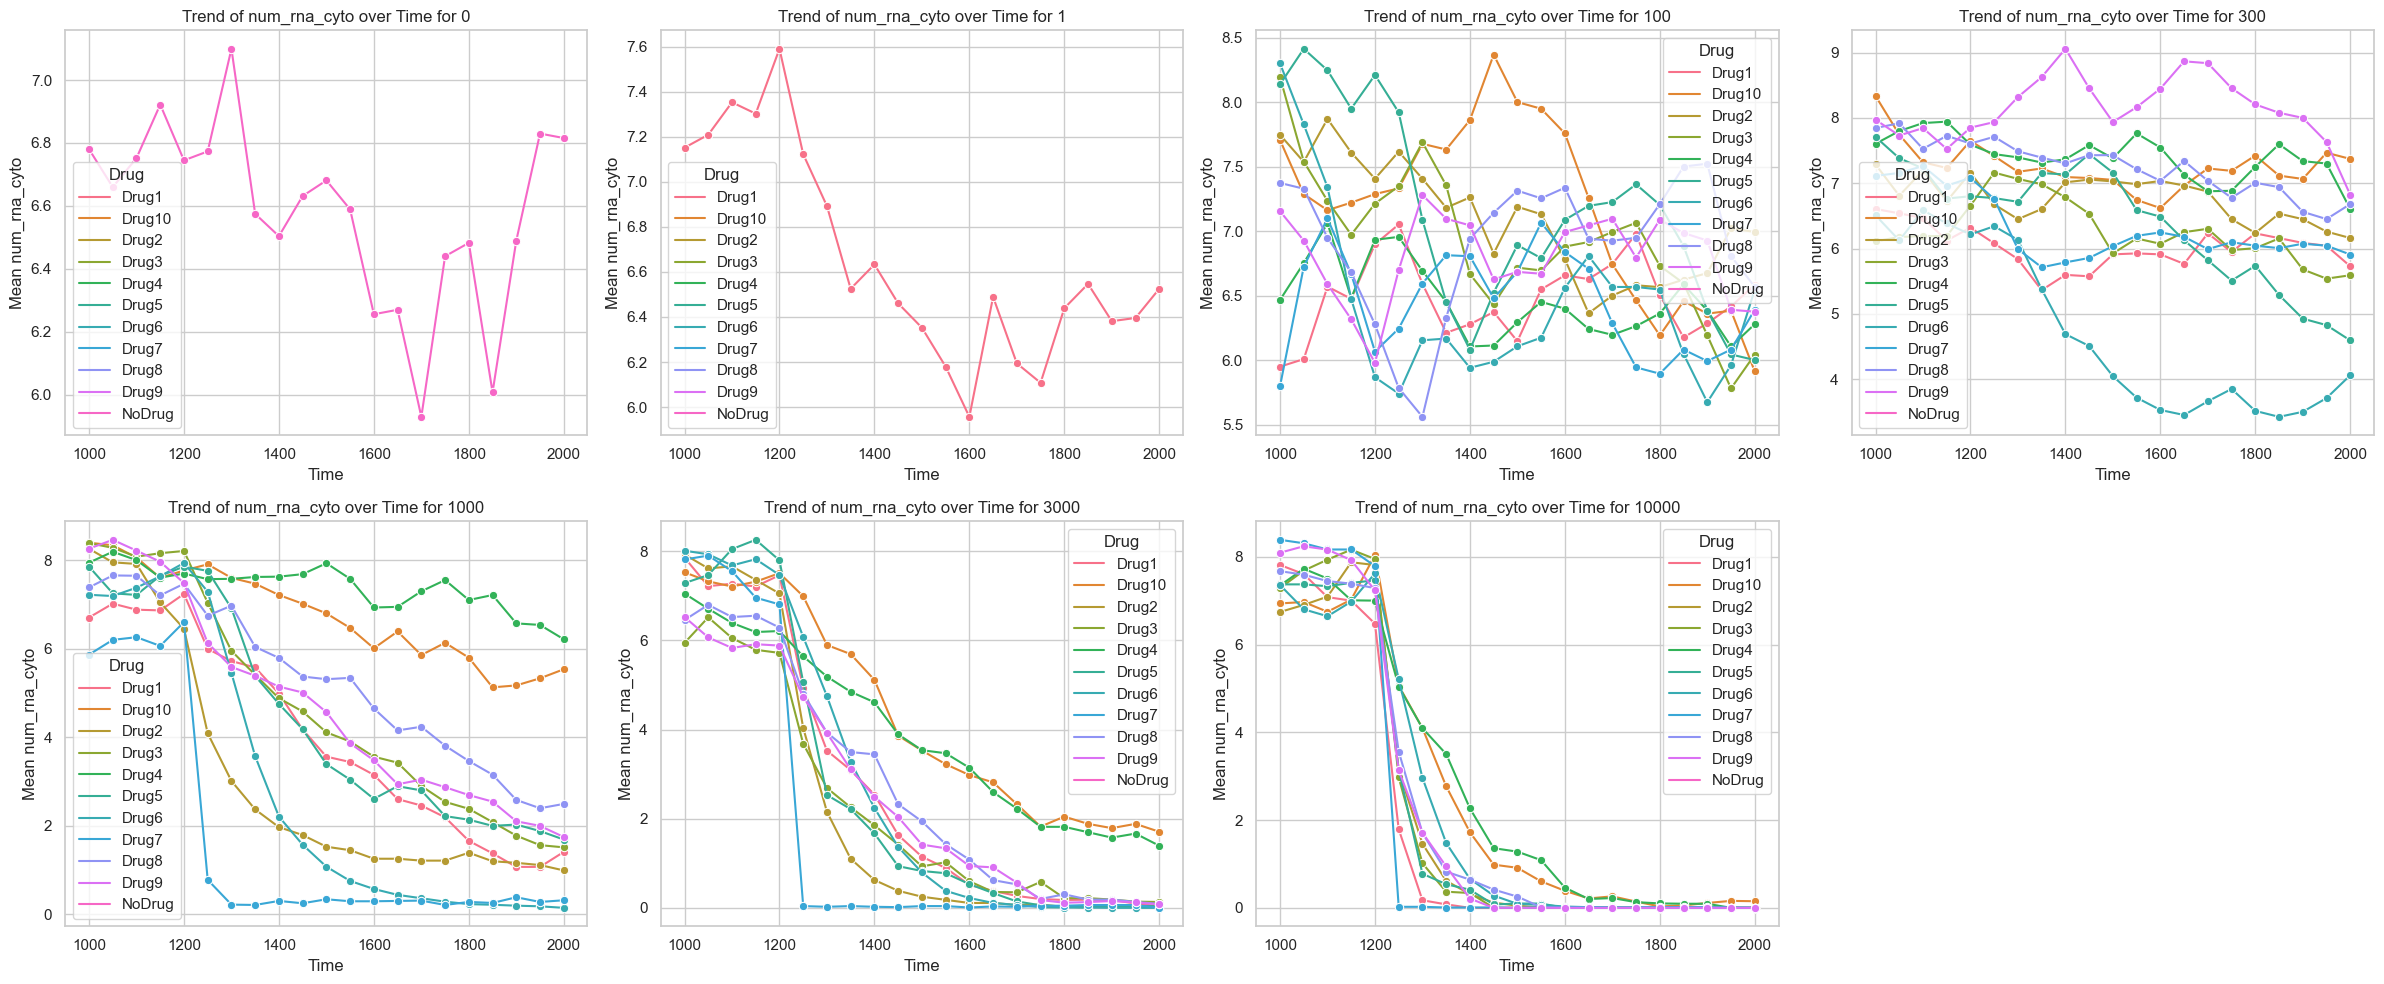

In [33]:
#Get unique drugs and set up the subplot grid
dosage = grouped_df['Dosage'].unique()
num_dosage = len(dosage)
fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # Adjust the grid size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create plots
for i, dosage in enumerate(dosage):
    ax = axes[i]
    dosage_df = grouped_df[grouped_df['Dosage'] == dosage]
    sns.lineplot(data=dosage_df, x='Time', y='num_rna_cyto', hue='Drug', marker='o', ax=ax)
    ax.set_title(f'Trend of num_rna_cyto over Time for {dosage}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean num_rna_cyto')
    ax.legend(title='Drug')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Protein Concentration

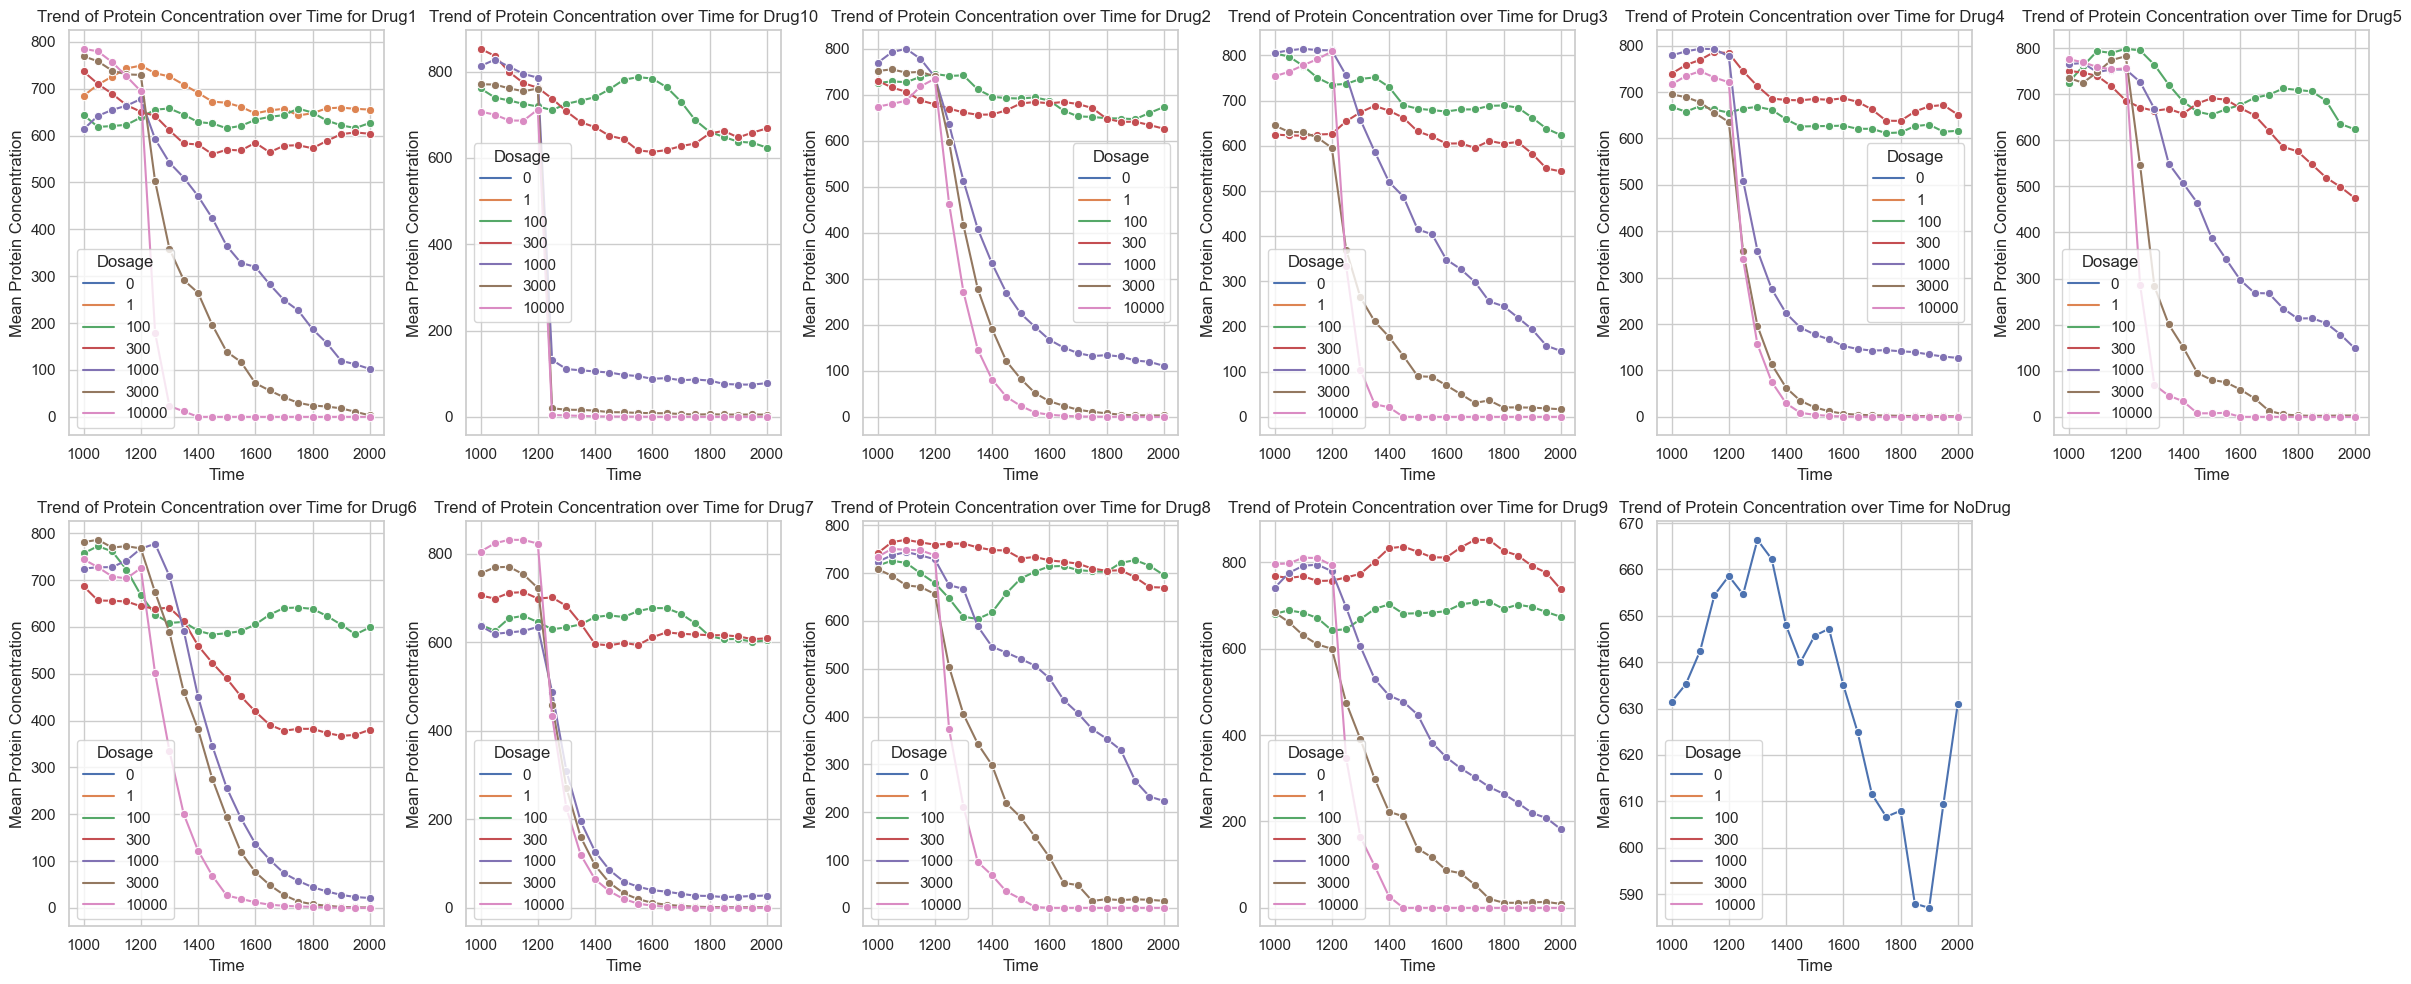

In [34]:
fig, axes = plt.subplots(2, 6, figsize=(24, 10))  # Adjust the grid size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create plots
for i, drug in enumerate(drugs):
    ax = axes[i]
    drug_df = grouped_df[grouped_df['Drug'] == drug]
    sns.lineplot(data=drug_df, x='Time', y='Cyto_Intensity_1', hue='Dosage', marker='o', ax=ax)
    ax.set_title(f'Trend of Protein Concentration over Time for {drug}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean Protein Concentration')
    ax.legend(title='Dosage')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

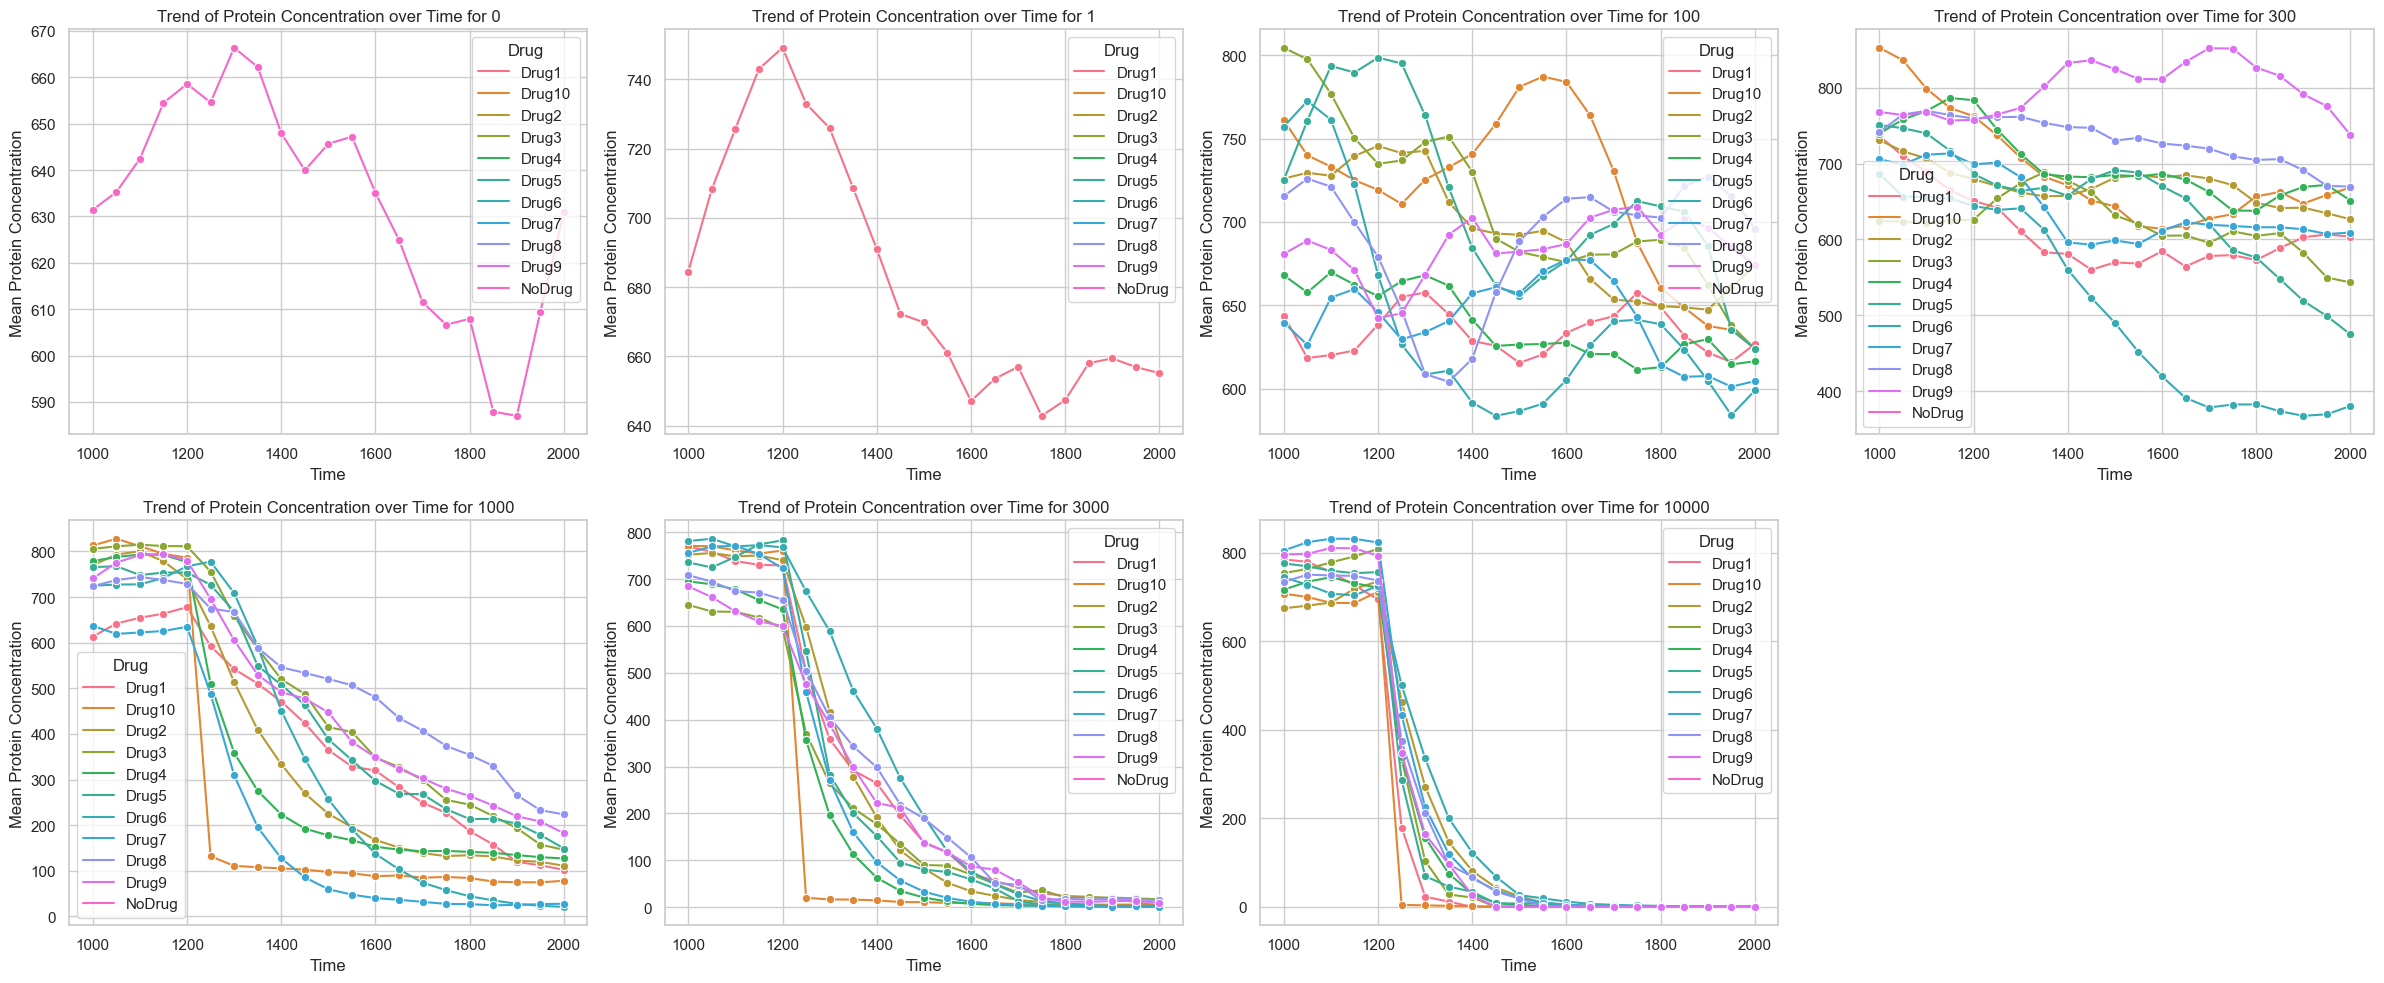

In [35]:
#Get unique drugs and set up the subplot grid
dosage = grouped_df['Dosage'].unique()
num_dosage = len(dosage)
fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # Adjust the grid size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create plots
for i, dosage in enumerate(dosage):
    ax = axes[i]
    dosage_df = grouped_df[grouped_df['Dosage'] == dosage]
    sns.lineplot(data=dosage_df, x='Time', y='Cyto_Intensity_1', hue='Drug', marker='o', ax=ax)
    ax.set_title(f'Trend of Protein Concentration over Time for {dosage}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean Protein Concentration')
    ax.legend(title='Drug')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()